In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib

In [19]:
datadir = 'C:/Users/khana/Documents/Masters/Semester 2/Earth and System Modelling/PLASIM/PLASIM Data/'
p100 = xr.open_dataset(datadir + 'p100_monthly.nc').mean('time')
m100 = xr.open_dataset(datadir + 'm100_monthly.nc').mean('time')
p500 = xr.open_dataset(datadir + 'p500_monthly.nc').mean('time')
preind_atm = xr.open_dataset(datadir + 'preind_atm_monthly.nc').mean('time')
preind_ocean = xr.open_dataset(datadir + 'preind_ocean_monthly.nc').mean('time')

In [24]:
surf_rad_p100 = p100.rss + p100.rls
atm_rad_p100 = p100.rst + p100.rlut

In [30]:
net_rad_p100 = surf_rad_p100 - atm_rad_p100

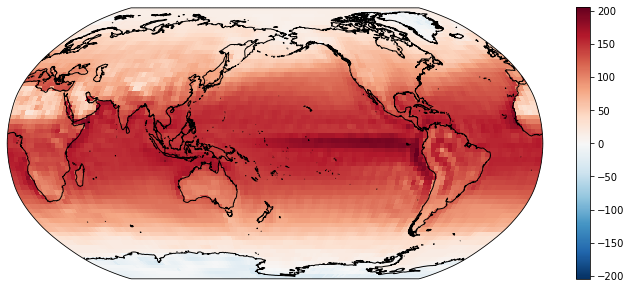

In [23]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

ax.coastlines(resolution='50m')
ax.add_feature(cfeature.LAND)
surf_rad_p100.plot(ax=ax, transform=ccrs.PlateCarree());

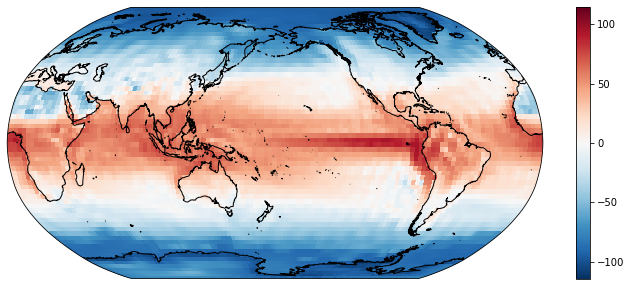

In [27]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

ax.coastlines(resolution='50m')
ax.add_feature(cfeature.LAND)
atm_rad_p100.plot(ax=ax, transform=ccrs.PlateCarree());

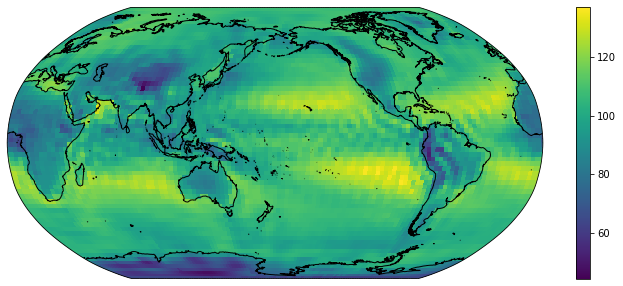

In [31]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

ax.coastlines(resolution='50m')
ax.add_feature(cfeature.LAND)
net_rad_p100.plot(ax=ax, transform=ccrs.PlateCarree());